### Crawling

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from urllib.request import urlretrieve

def search(search_=None):
    driver = webdriver.Chrome()
    driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&ogbl")
    elem = driver.find_element_by_name("q")
    elem.send_keys(search_)
    elem.send_keys(Keys.RETURN)

    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element_by_css_Selector(".mye4qd").click()
            except: break
        last_height = new_height

    images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
    count = 1
    for image in images:
        try:
            image.click()
            time.sleep(0.2)
            imgURL = driver.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img').get_attribute("src")
            urlretrieve(imgURL, search_ + str(count) + ".jpg")
            count += 1
        except: pass

    driver.close()

In [ ]:
search("뷔")
search("뷔 얼굴")
search("V")

In [ ]:
search("지민")
search("지민 얼굴")
search("bts 지민 얼굴")

In [ ]:
search("정국 얼굴")
search("bts 정국")
search("bts 정국 얼굴")

### crop face

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

<class 'numpy.ndarray'>


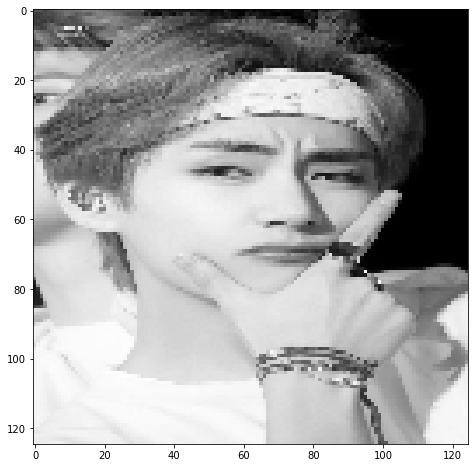

In [55]:
image = cv2.imread('./V/V (1).jpg')
print(type(image))
image = cv2.resize(image, (125, 125))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))
plt.imshow(image, cmap='gray')
plt.show()

In [56]:
faces = face_cascade.detectMultiScale(image, 1.03, 5)

print(faces.shape)
print("Number of faces detected: " + str(faces.shape[0]))

(1, 4)
Number of faces detected: 1


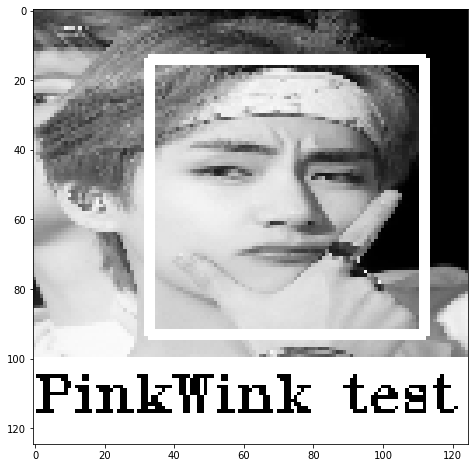

In [57]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

cv2.rectangle(image, ((0, image.shape[0] -25)), 
              (270, image.shape[0]), (255,255,255), -1);
cv2.putText(image, "PinkWink test", (0, image.shape[0] -10), 
            cv2.FONT_HERSHEY_TRIPLEX, 0.5,  (0,0,0), 1);

plt.figure(figsize=(12,8))
plt.imshow(image, cmap='gray')
plt.show()

33 14 79 79


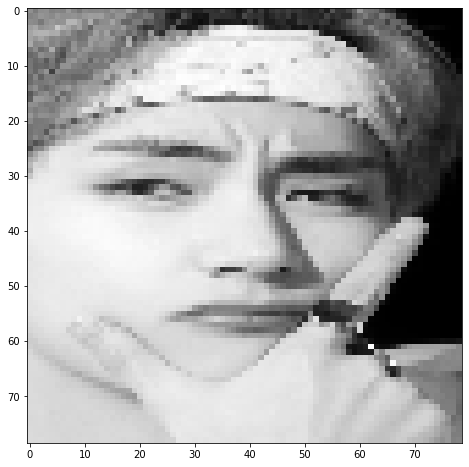

In [58]:
def img_crop(img):
    faces = face_cascade.detectMultiScale(img, 1.03, 5)
    x, y, w, h = faces[0]
    crop_img = img[y:y+h, x:x+w]
    print(x, y, w, h)
    plt.figure(figsize=(12, 8))
    plt.imshow(crop_img, cmap='gray')
    plt.show()

image = cv2.resize(cv2.imread('./V/V (1).jpg'), (125, 125))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_crop(image)

In [79]:
def img_crop(img, filename, foldername):
    faces = face_cascade.detectMultiScale(img, 1.03, 5)
    if len(faces) > 0:
        x, y, w, h = faces[0]
        crop_img = img[y:y+h, x:x+w]
        cv2.imwrite("./" + foldername + "/" + filename + ' face.jpg', crop_img)

In [81]:
import os

v_file_list = os.listdir("./V")[1:]
for filename in v_file_list:
    try:
        image = cv2.resize(cv2.imread('./V/' + filename), (125, 125))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_crop(image, filename[:-4], "V face")
    except: pass

In [83]:
jung_file_list = os.listdir("./Jungkook")[1:]
for filename in jung_file_list:
    try:
        image = cv2.resize(cv2.imread("./Jungkook/" + filename), (125, 125))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_crop(image, filename[:-4], "Jungkook face")
    except: pass

In [84]:
jimin_file_list = os.listdir("./Jimin")[1:]
for filename in jimin_file_list:
    try:
        image = cv2.resize(cv2.imread("./Jimin/" + filename), (125, 125))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_crop(image, filename[:-4], "Jimin face")
    except: pass